## Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When 
these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the 
company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, 
some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. 

## Business Goal :

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying 
customers. 

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead 
score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [156]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [157]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profile

%matplotlib inline

In [158]:
# Importing dataset

df = pd.read_csv('Leads.csv', encoding = 'latin')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [160]:
df.shape

(9240, 37)

In [161]:
# inspect dataframe
print(df.isnull().any())

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

In [162]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Cleansing

In [163]:
# check for percentage of null values in each column
percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)

In [164]:
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## There are some columns that have more than 25% null values.

In [165]:
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### There are no duplicate values in the data.

In [166]:
# check for percentage of null values in each column

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##  Drop the following columns that have more than 35% null values

In [167]:
#df = df.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
 #                         'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
  #                        'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

drop_column_list=[]
for i in df.columns:
   if (df[i].isnull().mean())*100>35:
    drop_column_list.append(i)
print(drop_column_list)

['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [168]:
#droping columns from dataframe
for i in drop_column_list:
  df.drop(i,axis=1,inplace=True)

#Checking shape
df.shape

(9240, 31)

In [169]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

df['Specialization'] = df['Specialization'].replace('Select', np.nan)
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select', np.nan)
df['Lead Profile'] = df['Lead Profile'].replace('Select', np.nan)
df['City'] = df['City'].replace('Select', np.nan)

In [170]:
# check for percentage of null values in each column after dropping columns having more than 30% null values

percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [171]:
df.shape

(9240, 31)

Following columns have null values :
    - Country
    - Lead Source
    - Total Visits
    - Page Views Per Visit
    - Last Activity    
    - What is your current occupation
    - What matters most to you in choosing a course
    
Let us see and decide whather we need to impute values in the above column or drop the columns.

In [172]:
#dealing with null columns having null % more than 5
null_columns_5pect=[]
for i in df.columns:
  if (df[i].isnull().mean())*100>5:
    null_columns_5pect.append(i)
print(null_columns_5pect)

['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'City']


In [173]:
df.shape

(9240, 31)

In [174]:
#dealing with null columns replacing with 'Unknown'
for i in null_columns_5pect:
  df[i]=df[i].replace(np.NaN,'Unknown')

In [175]:
#finding pect of null for rest column
(df.isnull().mean())*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [176]:
df.shape

(9240, 31)

In [177]:
#dropping rows which have/has null, they are nearly 1%
#checking shape before drop
print(df.shape)
#dropping null rows
df=df.dropna()
#checking shape after drop
print(df.shape)
#very less drop

(9240, 31)
(9074, 31)


In [178]:
#finally checking again the null values
(df.isnull().mean())*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

### No more null values and data cleansing is done. Good to proceed for EDA
## Step 3: Data Analysis
## EDA Process
### Univariate Analysis and Bivariate Analysis
Let us try and understand the data now based on each columns effect on the conversion rate

In [179]:

#Converted is a target variable.
#lets try to understand it.The target variable. Indicates whether a lead has been successfully converted or not."1" for success and "0" for failure
df["Converted"].unique()

array([0, 1], dtype=int64)

In [180]:
#percentage of converted
Converted_pect = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted_pect

37.85541106458012

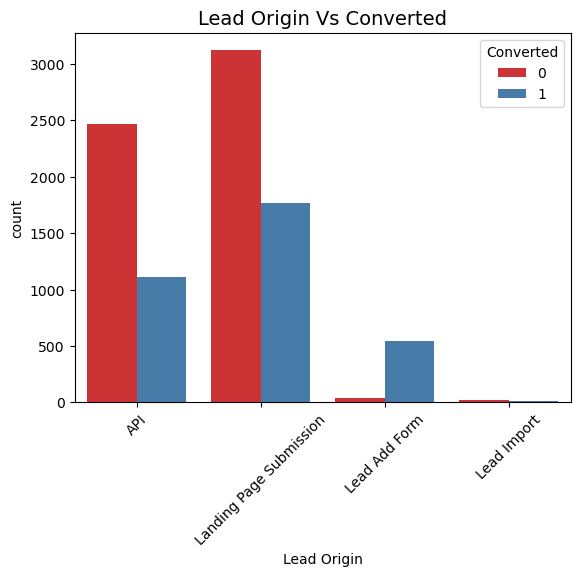

In [181]:
#Check the origin of lead
plt.title('Lead Origin Vs Converted', fontsize = 14)
sns.countplot(x = "Lead Origin", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation=45)
plt.show()

*   Major traffic comes from API and Landing page
*   If traffic comes from lead add, it will be converted successfully most of time.
*   Seems like if we concentrate on API and Landing page submission people, It will increase lead converson.


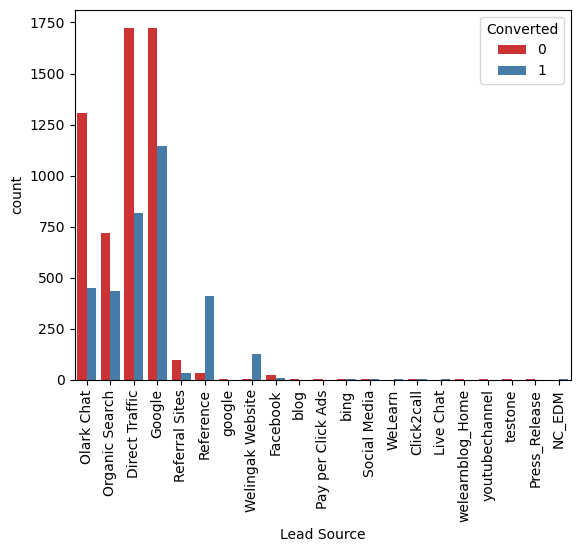

In [182]:
#Checking "Lead Source"
sns.countplot(x = "Lead Source", hue = "Converted", data = df, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [183]:
#  'google' and 'Google' are same so replacing
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

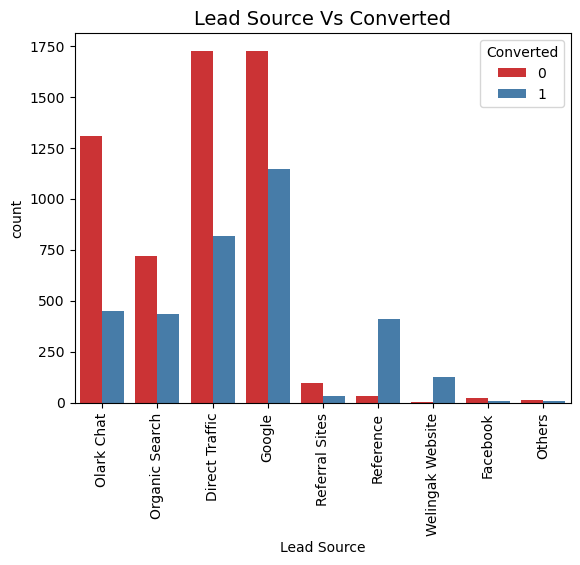

In [184]:
#Checking "Lead Source"
plt.title('Lead Source Vs Converted', fontsize = 14)
sns.countplot(x = "Lead Source", hue = "Converted", data = df, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

*   Olark chat,organic seach,direct traffic and google are major source of lead conversion
*   Traffic coming from Reference has conversion rate very high
*   We could concentrate on top 4 for more conversion rate

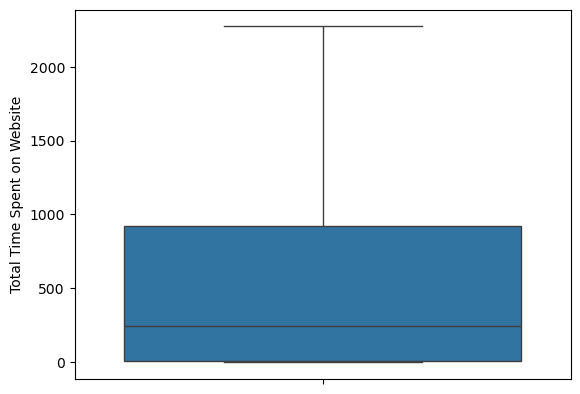

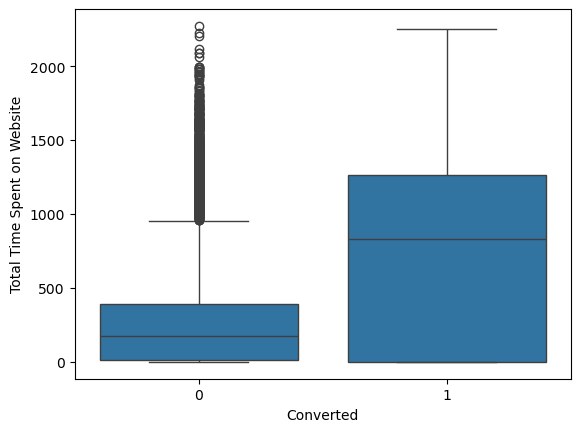

In [185]:
#Total Time Spent on Website
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

*   Leads spending more time on the weblise are more likely to be converted.


*   Website should be made more attractive and engaging to make leads spend more time.


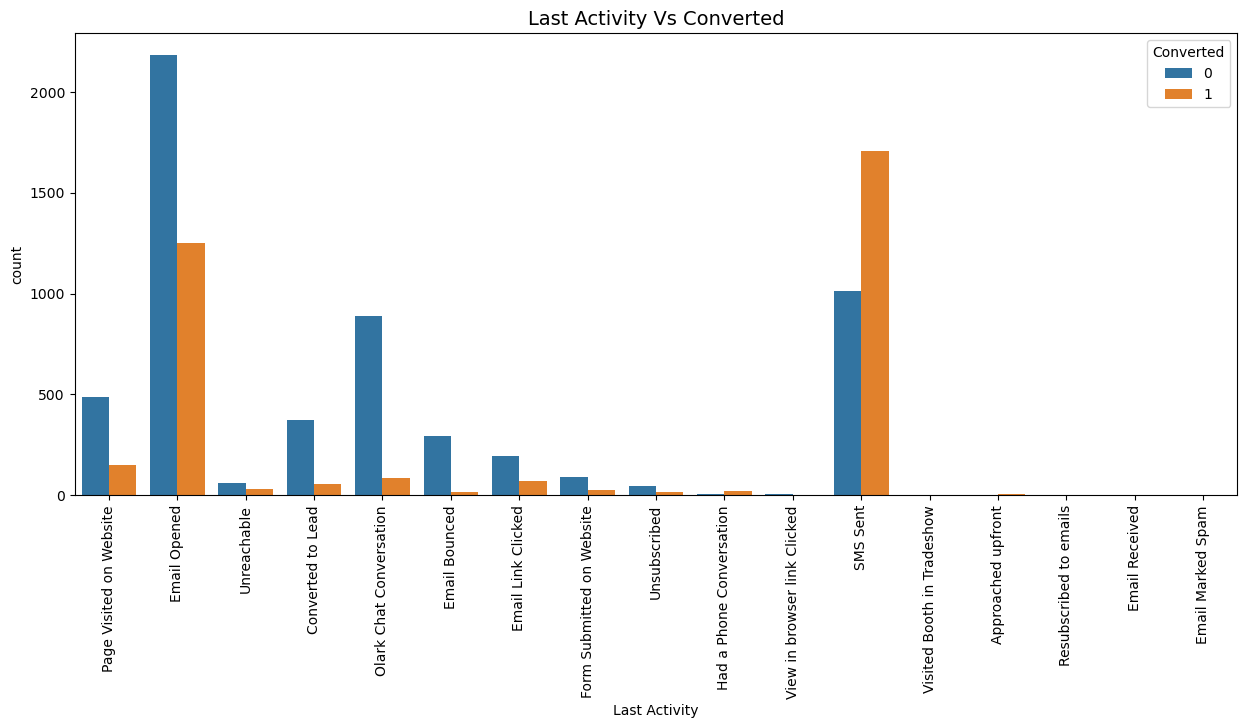

In [186]:
#Last Activity
plt.figure(figsize=(15,6))
plt.title('Last Activity Vs Converted', fontsize = 14)
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

*   Sms sent are mostly converted
*   Need to concentrate on Email opened because it is very high in number and conversion is not good


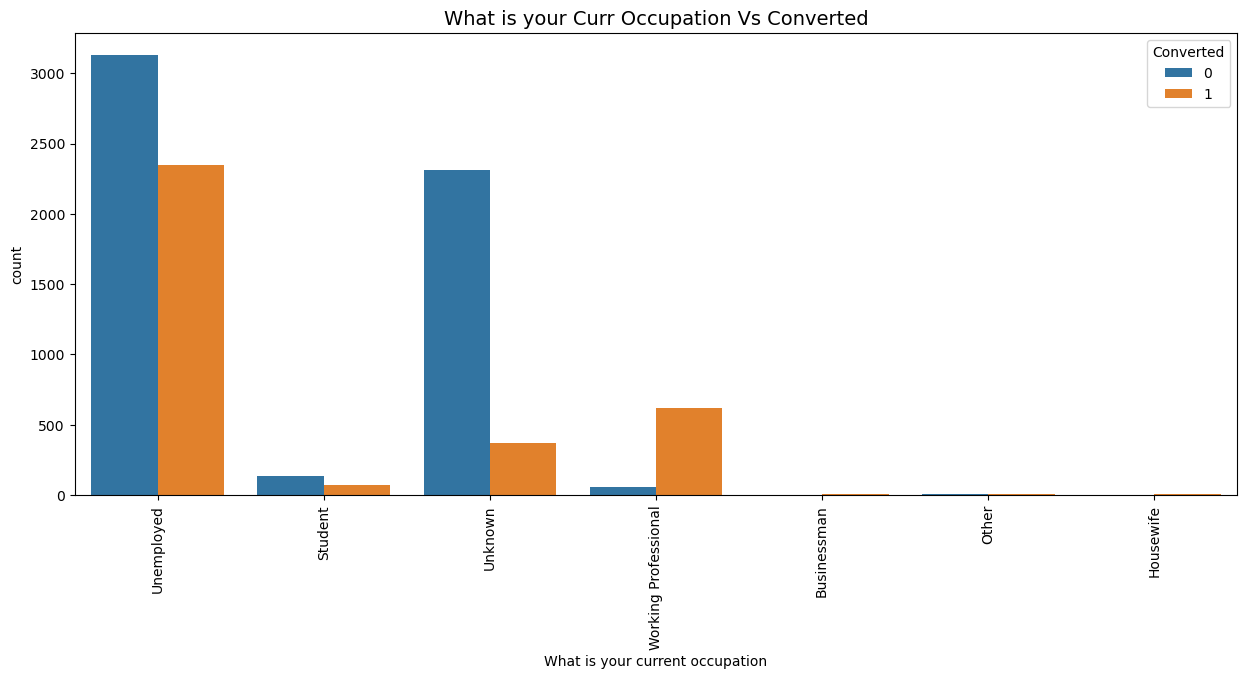

In [187]:

#What is your current occupation
plt.figure(figsize=(15,6))
plt.title('What is your Curr Occupation Vs Converted', fontsize = 14)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

*   Unemployed people are mostly not converted, may be due to cost of course
*   Working professionals have high convertion rate.
*   There are people under unknown category who have not filled the information of occupation are mostly not converted

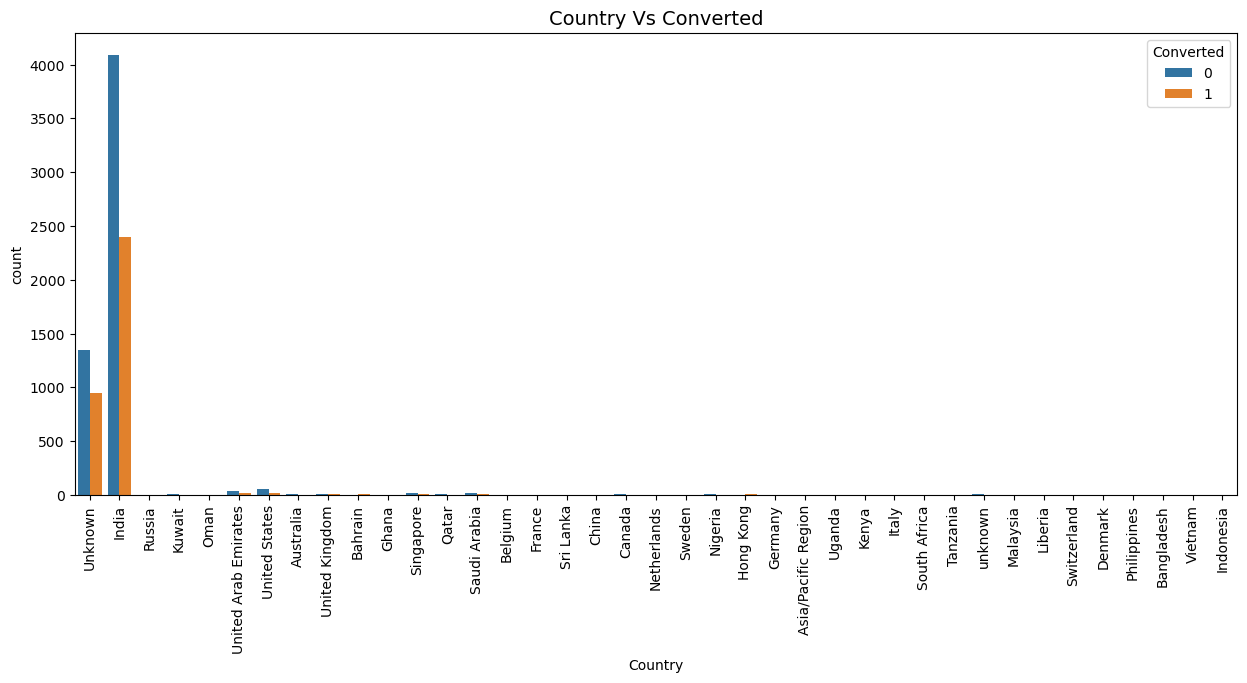

In [188]:
#Country
plt.figure(figsize=(15,6))
plt.title('Country Vs Converted', fontsize = 14)
sns.countplot(x = "Country", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()


#### Most of the people appling for course are from India

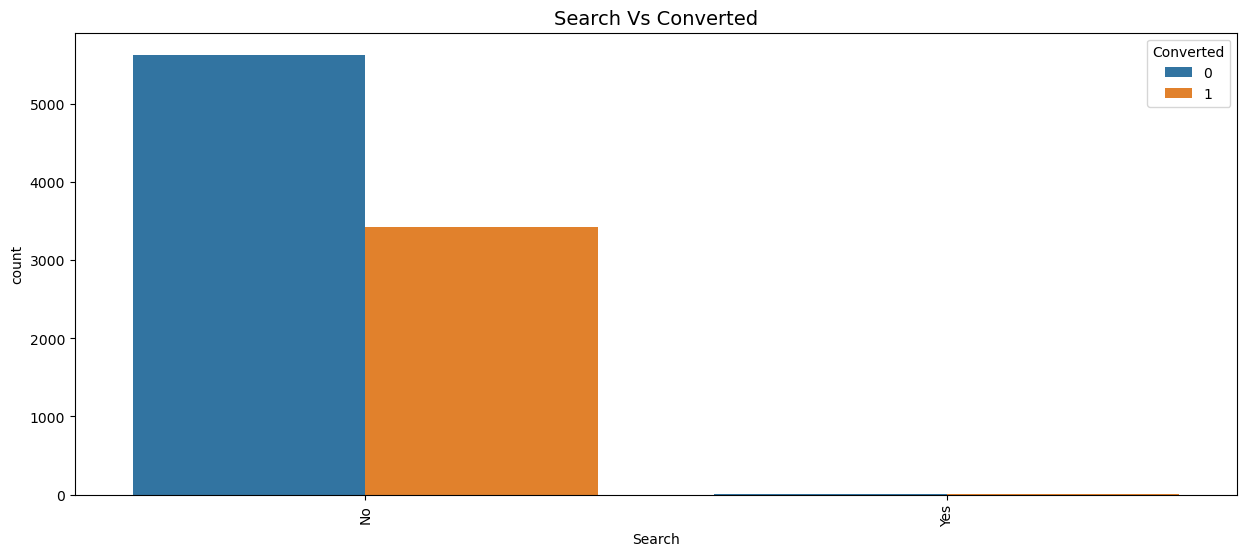

In [189]:
#Search
plt.figure(figsize=(15,6))
plt.title('Search Vs Converted', fontsize = 14)
sns.countplot(x = "Search", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

### No clarity on the Search 

In [190]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

# Also can drop few more unneccessary columns
df = df.drop(['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 non-n

In [191]:
#checking shape
print(df.shape)

(9074, 17)


All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data 
concentrated towards one value

In [192]:
df.shape

(9074, 17)

##### Outlier Treatment

In [193]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

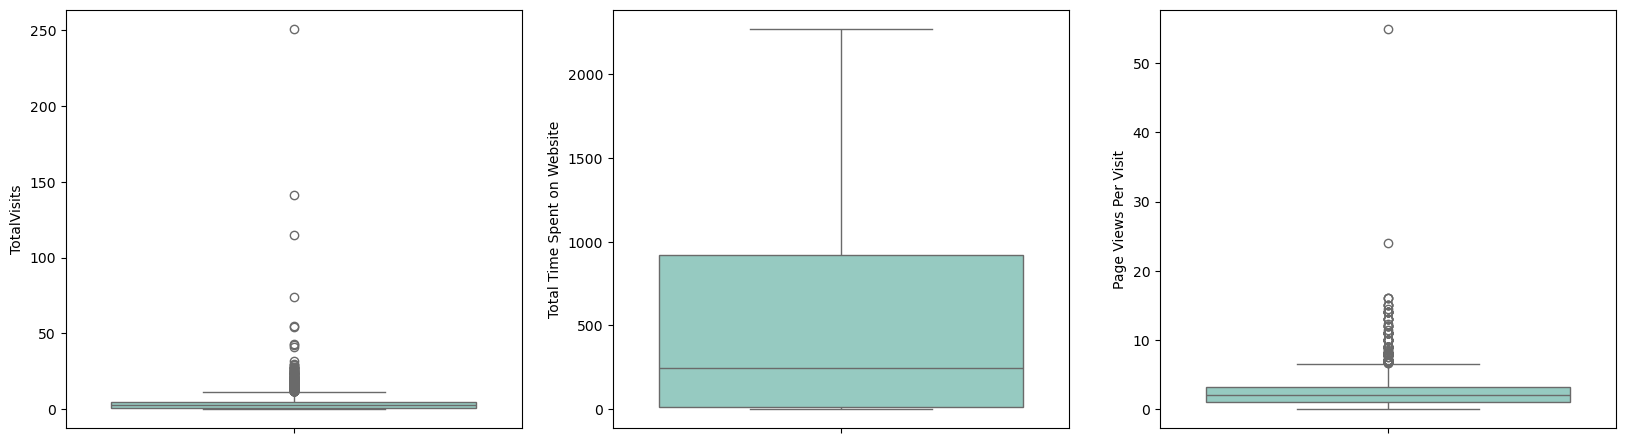

In [194]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = df)
plt.show()

In [195]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = df['TotalVisits'].quantile(0.99)
df = df[df["TotalVisits"] < nn_quartile_total_visits]
df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8975.000000
mean        3.192535
std         2.934948
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [196]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8975.000000,8975.000000,8975.000000,8975.000000
mean,0.378496,3.192535,481.180724,2.341840
std,0.485039,2.934948,545.041857,2.060971
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,8.500000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
95%,1.000000,9.000000,1556.000000,6.000000
99%,1.000000,13.000000,1837.520000,9.000000


In [197]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = df['Page Views Per Visit'].quantile(0.99)
df = df[df["Page Views Per Visit"] < nn_quartile_page_visits]
df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8863.000000
mean        2.236941
std         1.835885
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [198]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8863.000000,8863.000000,8863.000000,8863.000000
mean,0.378089,3.098387,478.122193,2.236941
std,0.484937,2.821961,544.532372,1.835885
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,1.000000
50%,0.000000,3.000000,240.000000,2.000000
75%,1.000000,4.000000,913.000000,3.000000
90%,1.000000,7.000000,1371.000000,5.000000
95%,1.000000,8.000000,1553.000000,6.000000
99%,1.000000,13.000000,1837.760000,7.000000


In [199]:
# Determine the percentage of data retained

num_data = round(100*(len(df)/9240),2)
print(num_data)

95.92


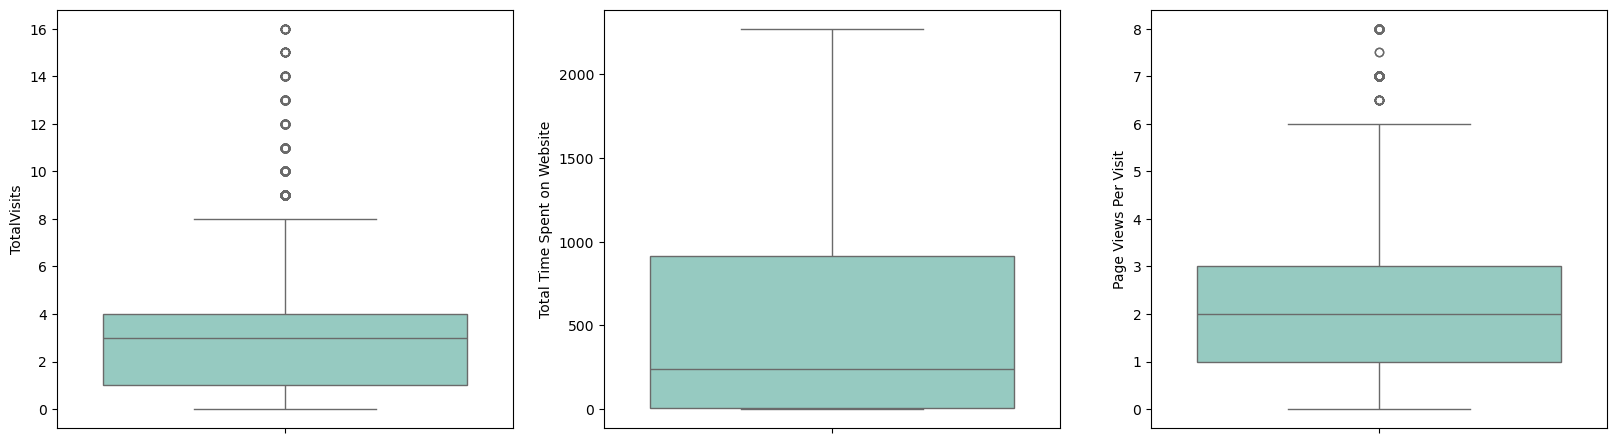

In [200]:
# View after handling outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = df)
plt.show()

At this point, the data has been cleaned and around 95% of data has been retained

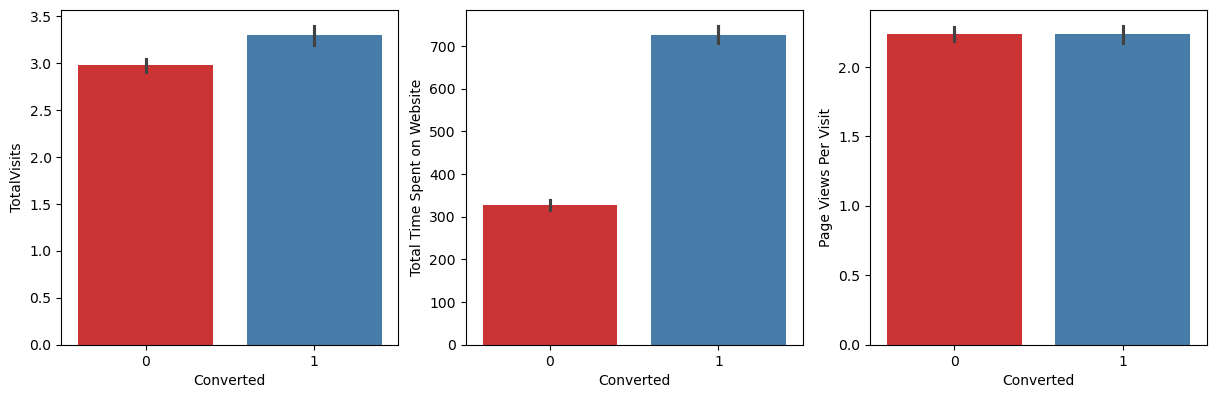

In [201]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = df)
plt.subplot(4,4,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set1', data = df)
plt.subplot(4,4,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set1', data = df)
plt.show()

### The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

## Step 4: Data Preparation - Creating encoded binary values.

Converting some binary variables (Yes/No) to 0/1

In [202]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
df[variablelist] = df[variablelist].apply(binary_map)

In [203]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Better Career Prospects,Unknown,Unknown,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unknown,Unknown,Unemployed,Better Career Prospects,Unknown,Unknown,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Unknown,Student,Better Career Prospects,Potential Lead,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Unknown,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unknown,Other,Unemployed,Better Career Prospects,Unknown,Mumbai,Modified


In [204]:
#preparing data for label encoding
#finding object columns
df_cols=df.loc[:,df.dtypes=='object']
df_cols.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'Last Notable Activity'],
      dtype='object')

In [205]:
#label encoding using the utility preprocessing from sklearn
from sklearn import preprocessing
lebelencoder=preprocessing.LabelEncoder()
for i in df_cols:
  df[i]=lebelencoder.fit_transform(df[i])

In [206]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,Last Notable Activity
0,4215,0,3,0,0,0,0.0,0,0.0,10,18,8,4,0,5,6,8
1,1493,0,4,0,0,0,5.0,674,2.5,5,18,8,4,0,5,6,4
2,4911,1,0,0,0,1,2.0,1532,2.0,5,1,8,3,0,3,0,4
3,457,1,0,0,0,0,1.0,305,1.0,13,11,9,4,0,5,0,8
4,1800,1,2,0,0,1,2.0,1428,1.0,1,18,4,4,0,5,0,8


In [207]:
# We can drop Prospect ID, as it is an id.
df=df.drop(['Prospect ID'],axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,Last Notable Activity
0,0,3,0,0,0,0.0,0,0.0,10,18,8,4,0,5,6,8
1,0,4,0,0,0,5.0,674,2.5,5,18,8,4,0,5,6,4
2,1,0,0,0,1,2.0,1532,2.0,5,1,8,3,0,3,0,4
3,1,0,0,0,0,1.0,305,1.0,13,11,9,4,0,5,0,8
4,1,2,0,0,1,2.0,1428,1.0,1,18,4,4,0,5,0,8


In [208]:
df.shape

(8863, 16)

### Step 5: Test-Train Split

In [209]:
#Splitting the data into train and test set.
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,Last Notable Activity
0,0,3,0,0,0.0,0,0.0,10,18,8,4,0,5,6,8
1,0,4,0,0,5.0,674,2.5,5,18,8,4,0,5,6,4
2,1,0,0,0,2.0,1532,2.0,5,1,8,3,0,3,0,4
3,1,0,0,0,1.0,305,1.0,13,11,9,4,0,5,0,8
4,1,2,0,0,2.0,1428,1.0,1,18,4,4,0,5,0,8


In [210]:
# Putting response variable to y

y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [211]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Step 6: Rescaling the features with StandardScalar Scaling

In [212]:
#Scaling feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                            'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,Last Notable Activity
7285,0,2,0,0,-0.399295,-0.836072,-0.138774,3,6,8,6,0,2,0,2
8563,1,4,0,0,-0.399295,1.759660,-0.138774,1,4,8,4,0,5,5,8
408,1,2,0,0,-0.399295,-0.430546,-0.138774,7,10,3,5,3,5,4,8
1980,0,2,0,0,-0.399295,-0.415932,-0.682025,5,18,8,5,3,5,6,4
6042,0,2,0,0,-0.399295,-0.879912,-0.138774,1,18,8,5,3,5,6,8


In [213]:
### Checking the Conversion Rate percentage

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.80886832900824

#### We have almost 38% conversion rate

### Step 7: Feature Selection Using RFE

In [214]:
## Using RFE feature selection method of LogisticRegression we choose the most optimal 15 variables for our Model building
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [215]:
#columns selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Specialization', True, 1),
 ('How did you hear about X Education', True, 1),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Lead Profile', True, 1),
 ('City', True, 1),
 ('Last Notable Activity', True, 1)]

In [216]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'Last Notable Activity'],
      dtype='object')

### Step 8: Model Building
Assessing the model with StatsModels

#### Running the Initial Training Model

In [217]:
import statsmodels.api as sm

In [218]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.2
Date:                Sun, 26 Jan 2025   Deviance:                       5432.5
Time:                        12:29:34   Pearson chi2:                 6.28e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3667
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.2052      0.377    -11.167      0.000      -4.943      -3.467
Lead Origin                                       0.4269      0.073      5.838      0.000       0.284       0.570
Lead Source                                       0.2934      0.022     13.493      0.000       0.251       0.336
Do Not Email                                     -1.5382      0.168     -9.138      0.000      -1.868      -1.208
Do Not Call                                      19.5431   1.21e+04      0.002      0.999   -2.36e+04    2.36e+04
TotalVisits                                       0.1030      0.048      2.133      0.033       0.008       0.198
Total Time Spent on Website                       1.0015      0.039     25.928      0.000       0.926       1.077
Page Views Per Visit                             -0.4484      0.052     -8.648      0.000      -0.550      -0.347
Last Activity                                     0.1468      0.015      9.496      0.000       0.117       0.177
Specialization                                   -0.0131      0.008     -1.722      0.085      -0.028       0.002
How did you hear about X Education                0.0123      0.019      0.655      0.513      -0.024       0.049
What is your current occupation                   0.8619      0.072     11.955      0.000       0.721       1.003
What matters most to you in choosing a course    -0.6912      0.037    -18.435      0.000      -0.765      -0.618
Lead Profile                                     -0.4244      0.036    -11.709      0.000      -0.495      -0.353
City                                              0.0148      0.019      0.763      0.446      -0.023       0.053
Last Notable Activity                             0.0379      0.017      2.219      0.027       0.004       0.071
=================================================================================================================
"""

## Checking VIFs

In [219]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [220]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation,30.49
12,Lead Profile,19.69
14,Last Notable Activity,16.11
9,How did you hear about X Education,15.86
7,Last Activity,12.89
8,Specialization,8.51
13,City,5.47
0,Lead Origin,3.72
1,Lead Source,3.40
6,Page Views Per Visit,2.33


#### Highest p value for Do Not Call and hence is insignificant

In [221]:
#dropping Do Not Call
col1=cols.drop("Do Not Call")

#### Rebuilding Model - Model 2

In [222]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.9
Date:                Sun, 26 Jan 2025   Deviance:                       5433.8
Time:                        12:29:35   Pearson chi2:                 6.29e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3666
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.2004      0.377    -11.156      0.000      -4.938      -3.462
Lead Origin                                       0.4254      0.073      5.822      0.000       0.282       0.569
Lead Source                                       0.2939      0.022     13.519      0.000       0.251       0.337
Do Not Email                                     -1.5388      0.168     -9.140      0.000      -1.869      -1.209
TotalVisits                                       0.1042      0.048      2.159      0.031       0.010       0.199
Total Time Spent on Website                       1.0022      0.039     25.943      0.000       0.926       1.078
Page Views Per Visit                             -0.4499      0.052     -8.680      0.000      -0.552      -0.348
Last Activity                                     0.1466      0.015      9.485      0.000       0.116       0.177
Specialization                                   -0.0131      0.008     -1.721      0.085      -0.028       0.002
How did you hear about X Education                0.0118      0.019      0.627      0.530      -0.025       0.049
What is your current occupation                   0.8619      0.072     11.953      0.000       0.721       1.003
What matters most to you in choosing a course    -0.6915      0.037    -18.443      0.000      -0.765      -0.618
Lead Profile                                     -0.4241      0.036    -11.703      0.000      -0.495      -0.353
City                                              0.0144      0.019      0.739      0.460      -0.024       0.053
Last Notable Activity                             0.0381      0.017      2.233      0.026       0.005       0.072
=================================================================================================================
"""

#### Higher PValue for City as well and may be its insignificant, so we can drop that as well.

In [223]:
col2=col1.drop("City")

#### Rebuilding Model - Model 3

In [224]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.2
Date:                Sun, 26 Jan 2025   Deviance:                       5434.3
Time:                        12:29:35   Pearson chi2:                 6.28e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3666
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.2069      0.376    -11.177      0.000      -4.945      -3.469
Lead Origin                                       0.4036      0.067      6.044      0.000       0.273       0.535
Lead Source                                       0.2986      0.021     14.350      0.000       0.258       0.339
Do Not Email                                     -1.5416      0.168     -9.158      0.000      -1.871      -1.212
TotalVisits                                       0.1008      0.048      2.098      0.036       0.007       0.195
Total Time Spent on Website                       1.0021      0.039     25.929      0.000       0.926       1.078
Page Views Per Visit                             -0.4546      0.051     -8.834      0.000      -0.555      -0.354
Last Activity                                     0.1469      0.015      9.505      0.000       0.117       0.177
Specialization                                   -0.0112      0.007     -1.565      0.117      -0.025       0.003
How did you hear about X Education                0.0135      0.019      0.726      0.468      -0.023       0.050
What is your current occupation                   0.8637      0.072     11.986      0.000       0.722       1.005
What matters most to you in choosing a course    -0.6922      0.037    -18.464      0.000      -0.766      -0.619
Lead Profile                                     -0.4217      0.036    -11.685      0.000      -0.492      -0.351
Last Notable Activity                             0.0380      0.017      2.229      0.026       0.005       0.071
=================================================================================================================
"""

#### P values look ok for this model.. Lets check the VIF now

In [225]:
# Check for the VIF values of the feature variables of 3rd Model. 
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation,30.28
11,Lead Profile,19.67
12,Last Notable Activity,16.11
8,How did you hear about X Education,15.66
6,Last Activity,12.87
7,Specialization,7.70
0,Lead Origin,3.11
1,Lead Source,3.06
5,Page Views Per Visit,2.29
3,TotalVisits,2.18


In [226]:
#high vif still for column "What is your occupation, hence it could be insignificant"
col3=col2.drop("What is your current occupation")

### Rebuilding Model 4

In [227]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6191
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2807.7
Date:                Sun, 26 Jan 2025   Deviance:                       5615.4
Time:                        12:29:36   Pearson chi2:                 6.19e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3478
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.5990      0.227     -2.643      0.008      -1.043      -0.155
Lead Origin                                       0.4233      0.065      6.476      0.000       0.295       0.551
Lead Source                                       0.3020      0.020     14.842      0.000       0.262       0.342
Do Not Email                                     -1.5793      0.165     -9.556      0.000      -1.903      -1.255
TotalVisits                                       0.0908      0.047      1.917      0.055      -0.002       0.184
Total Time Spent on Website                       1.0068      0.038     26.388      0.000       0.932       1.082
Page Views Per Visit                             -0.4458      0.051     -8.809      0.000      -0.545      -0.347
Last Activity                                     0.1482      0.015      9.779      0.000       0.119       0.178
Specialization                                   -0.0170      0.007     -2.416      0.016      -0.031      -0.003
How did you hear about X Education                0.0201      0.018      1.099      0.272      -0.016       0.056
What matters most to you in choosing a course    -0.4281      0.030    -14.330      0.000      -0.487      -0.370
Lead Profile                                     -0.4467      0.035    -12.736      0.000      -0.515      -0.378
Last Notable Activity                             0.0432      0.017      2.583      0.010       0.010       0.076
=================================================================================================================
"""

In [228]:
# Check for the VIF values of the feature variables of Model 4
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Profile,16.32
11,Last Notable Activity,15.73
6,Last Activity,12.86
8,How did you hear about X Education,12.12
7,Specialization,7.66
1,Lead Source,3.00
0,Lead Origin,2.82
5,Page Views Per Visit,2.28
3,TotalVisits,2.18
9,What matters most to you in choosing a course,1.73


In [229]:
#high vif of Lead Profile and is insignificant again , should be removed.
col4=col3.drop("Lead Profile")

### Rebuilding Model 5

In [230]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6192
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2892.4
Date:                Sun, 26 Jan 2025   Deviance:                       5784.8
Time:                        12:29:36   Pearson chi2:                 6.16e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3298
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.2827      0.185    -12.350      0.000      -2.645      -1.920
Lead Origin                                       0.4280      0.064      6.673      0.000       0.302       0.554
Lead Source                                       0.3181      0.020     15.935      0.000       0.279       0.357
Do Not Email                                     -1.5785      0.163     -9.682      0.000      -1.898      -1.259
TotalVisits                                       0.0910      0.047      1.939      0.052      -0.001       0.183
Total Time Spent on Website                       1.0152      0.038     26.891      0.000       0.941       1.089
Page Views Per Visit                             -0.4815      0.050     -9.630      0.000      -0.580      -0.384
Last Activity                                     0.1341      0.015      9.054      0.000       0.105       0.163
Specialization                                   -0.0329      0.007     -4.848      0.000      -0.046      -0.020
How did you hear about X Education                0.0307      0.018      1.709      0.088      -0.005       0.066
What matters most to you in choosing a course    -0.5314      0.029    -18.553      0.000      -0.588      -0.475
Last Notable Activity                             0.0386      0.016      2.355      0.019       0.006       0.071
=================================================================================================================
"""

In [231]:
# Check for the VIF values of the feature variables of Model 5
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity,15.29
6,Last Activity,12.81
8,How did you hear about X Education,9.46
7,Specialization,6.60
1,Lead Source,3.00
0,Lead Origin,2.61
5,Page Views Per Visit,2.25
3,TotalVisits,2.18
9,What matters most to you in choosing a course,1.52
4,Total Time Spent on Website,1.25


In [232]:
#removing Last Notable Activity due to high VIF
col5=col4.drop("Last Notable Activity")

### Rebuilding Model 6

In [233]:
X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6193
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.1
Date:                Sun, 26 Jan 2025   Deviance:                       5790.3
Time:                        12:29:37   Pearson chi2:                 6.16e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3292
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.1866      0.180    -12.147      0.000      -2.539      -1.834
Lead Origin                                       0.4237      0.064      6.616      0.000       0.298       0.549
Lead Source                                       0.3172      0.020     15.897      0.000       0.278       0.356
Do Not Email                                     -1.5475      0.163     -9.500      0.000      -1.867      -1.228
TotalVisits                                       0.0826      0.047      1.769      0.077      -0.009       0.174
Total Time Spent on Website                       1.0182      0.038     26.985      0.000       0.944       1.092
Page Views Per Visit                             -0.4820      0.050     -9.655      0.000      -0.580      -0.384
Last Activity                                     0.1617      0.009     17.402      0.000       0.144       0.180
Specialization                                   -0.0333      0.007     -4.909      0.000      -0.047      -0.020
How did you hear about X Education                0.0299      0.018      1.668      0.095      -0.005       0.065
What matters most to you in choosing a course    -0.5355      0.029    -18.735      0.000      -0.591      -0.479
=================================================================================================================
"""

In [234]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,How did you hear about X Education,9.06
7,Specialization,6.54
6,Last Activity,4.83
1,Lead Source,3.00
0,Lead Origin,2.57
5,Page Views Per Visit,2.25
3,TotalVisits,2.17
9,What matters most to you in choosing a course,1.52
4,Total Time Spent on Website,1.24
2,Do Not Email,1.11


In [235]:
#dropping How did you hear about X Education due to high vif
col6=col5.drop("How did you hear about X Education")

### Rebuild the next Model 7

In [236]:
X_train_sm = sm.add_constant(X_train[col6])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6194
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.5
Date:                Sun, 26 Jan 2025   Deviance:                       5793.0
Time:                        12:29:37   Pearson chi2:                 6.16e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3289
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.9773      0.128    -15.389      0.000      -2.229      -1.725
Lead Origin                                       0.4157      0.064      6.521      0.000       0.291       0.541
Lead Source                                       0.3169      0.020     15.888      0.000       0.278       0.356
Do Not Email                                     -1.5359      0.163     -9.430      0.000      -1.855      -1.217
TotalVisits                                       0.0808      0.047      1.730      0.084      -0.011       0.172
Total Time Spent on Website                       1.0158      0.038     26.939      0.000       0.942       1.090
Page Views Per Visit                             -0.4906      0.050     -9.869      0.000      -0.588      -0.393
Last Activity                                     0.1614      0.009     17.382      0.000       0.143       0.180
Specialization                                   -0.0319      0.007     -4.744      0.000      -0.045      -0.019
What matters most to you in choosing a course    -0.5362      0.029    -18.768      0.000      -0.592      -0.480
=================================================================================================================
"""

In [237]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization,4.25
6,Last Activity,4.16
1,Lead Source,2.99
5,Page Views Per Visit,2.25
3,TotalVisits,2.17
0,Lead Origin,2.14
8,What matters most to you in choosing a course,1.50
4,Total Time Spent on Website,1.24
2,Do Not Email,1.10


### Since the Model 7 seems to be stable with significant pvalues, lower VIF's we shall go ahead with this model for further analysis .We have 9 variables in our final model.

#### Making Prediction on the Train set

In [238]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7285    0.134240
8563    0.826817
408     0.106520
1980    0.055253
6042    0.014451
3097    0.531049
8181    0.849284
1764    0.234509
815     0.203439
6578    0.196888
dtype: float64

In [239]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13423978, 0.82681716, 0.1065196 , 0.05525323, 0.01445087,
       0.53104899, 0.84928382, 0.23450902, 0.20343857, 0.196888  ])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [240]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.134240,7285
1,0,0.826817,8563
2,0,0.106520,408
3,0,0.055253,1980
4,0,0.014451,6042


##### Choose a random cut off value 0.5 and derive the predicted values by creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [241]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.134240,7285,0
1,0,0.826817,8563,1
2,0,0.106520,408,0
3,0,0.055253,1980,0
4,0,0.014451,6042,0


### Lets create the confusion matrix and check the metrics

In [242]:
from sklearn import metrics

In [243]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3297  521]
 [ 842 1544]]


In [244]:
# Predicted     not_converted    converted
# Actual
# not_converted        3297      521
# converted            842       1544

In [245]:
# Let's check the overall accuracy.
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

#print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7803030303030303


Accuracy rate is around 78% which is good. However we will also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics

##### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [246]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [247]:

# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.647108130762783


In [248]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8635411210057622


In [249]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.1364588789942378


In [250]:
# positive predictive value

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7476997578692494


In [251]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.7965692196182653


#### We found out that our specificity was good (~86%) but our sensitivity was only 64%. Hence, this needed to be taken care of.

#### We have got sensitivity of 64% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [252]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [253]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

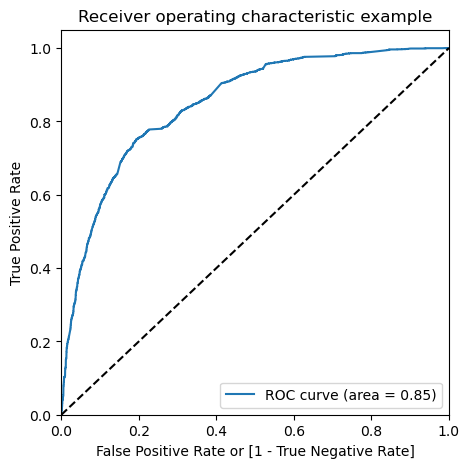

In [254]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [255]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.134240,7285,0,1,1,0,0,0,0,0,0,0,0
1,0,0.826817,8563,1,1,1,1,1,1,1,1,1,1,0
2,0,0.106520,408,0,1,1,0,0,0,0,0,0,0,0
3,0,0.055253,1980,0,1,0,0,0,0,0,0,0,0,0
4,0,0.014451,6042,0,1,0,0,0,0,0,0,0,0,0


In [256]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384591  1.000000  0.000000
0.1   0.1  0.553514  0.980721  0.286537
0.2   0.2  0.688104  0.922883  0.541383
0.3   0.3  0.741296  0.830679  0.685437
0.4   0.4  0.781915  0.756077  0.798062
0.5   0.5  0.780303  0.647108  0.863541
0.6   0.6  0.769504  0.553646  0.904400
0.7   0.7  0.746937  0.443001  0.936878
0.8   0.8  0.710026  0.297569  0.967784
0.9   0.9  0.650709  0.106873  0.990571


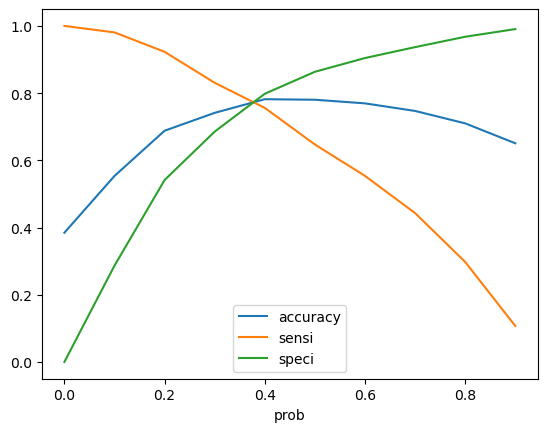

In [257]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [258]:
# Let us make the final prediction using 0.38 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.134240,7285,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.826817,8563,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.106520,408,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.055253,1980,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.014451,6042,0,1,0,0,0,0,0,0,0,0,0,0


In [259]:
# Now let us calculate the lead score and add it to the dataframe

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.134240,7285,0,1,1,0,0,0,0,0,0,0,0,0,13
1,0,0.826817,8563,1,1,1,1,1,1,1,1,1,1,0,1,83
2,0,0.106520,408,0,1,1,0,0,0,0,0,0,0,0,0,11
3,0,0.055253,1980,0,1,0,0,0,0,0,0,0,0,0,0,6
4,0,0.014451,6042,0,1,0,0,0,0,0,0,0,0,0,0,1
5,1,0.531049,3097,1,1,1,1,1,1,1,0,0,0,0,1,53
6,0,0.849284,8181,1,1,1,1,1,1,1,1,1,1,0,1,85
7,1,0.234509,1764,0,1,1,1,0,0,0,0,0,0,0,0,23
8,0,0.203439,815,0,1,1,1,0,0,0,0,0,0,0,0,20
9,0,0.196888,6578,0,1,1,0,0,0,0,0,0,0,0,0,20


In [260]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

final_predicted
1    1854
0     532
Name: count, dtype: int64

In [261]:
# check the precentage of final_predicted conversions
1854/float(1854+532)

0.7770326906957251

#### Hence we can see that the final prediction of conversions have a target of 80% (77.7%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value  on final prediction on train set

In [262]:
# Let's check the overall accuracy.

print("Accuracy : ",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy :  0.7753062540296582


In [263]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2956,  862],
       [ 532, 1854]], dtype=int64)

In [264]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [265]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7770326906957251


In [266]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7742273441592457


In [267]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.22577265584075432


In [268]:
# Positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6826215022091311


In [269]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8474770642201835


### Metrics - Precision and Recall

In [270]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3297,  521],
       [ 842, 1544]], dtype=int64)

In [271]:
from sklearn.metrics import precision_score, recall_score

In [272]:
# precision

print("precision score : ",precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

precision score :  0.7476997578692494


In [273]:
# recall

print("recall score : ",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

recall score :  0.647108130762783


### Precision and recall tradeoff

In [274]:
from sklearn.metrics import precision_recall_curve

In [275]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    1
 6201    1
 6202    1
 6203    0
 Name: Converted, Length: 6204, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6199    1
 6200    1
 6201    0
 6202    1
 6203    0
 Name: predicted, Length: 6204, dtype: int64)

In [276]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

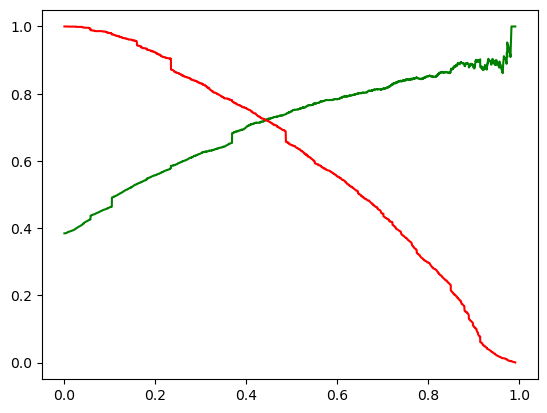

In [277]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test set

In [278]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                'Total Time Spent on Website',
                                                                                                'Page Views Per Visit']])

In [279]:
# Assigning the columns selected by the final model to the X_test
X_test = X_test[col6]
X_test.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What matters most to you in choosing a course
8361,1,0,1,-0.399295,1.366921,-0.138774,12,12,0
6802,0,3,0,-1.107783,-0.887219,-1.225276,9,18,3
6213,0,3,0,-1.107783,-0.887219,-1.225276,5,18,3
5096,0,2,0,-0.045051,0.754979,0.404477,12,18,0
239,1,0,0,-0.399295,1.038116,-0.138774,5,7,0


In [280]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [281]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8361    0.470297
6802    0.104714
6213    0.057783
5096    0.642087
239     0.528104
4036    0.234509
4188    0.373324
5101    0.057783
2326    0.323166
6804    0.019483
dtype: float64

In [282]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [283]:
# Let's see the head

y_pred_1.head()

,0
8361,0.470297
6802,0.104714
6213,0.057783
5096,0.642087
239,0.528104


In [284]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [285]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [286]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [287]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [288]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8361,0.470297
1,0,6802,0.104714
2,0,6213,0.057783
3,1,5096,0.642087
4,0,239,0.528104


In [289]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [290]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [291]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,8361,0,0.470297
1,6802,0,0.104714
2,6213,0,0.057783
3,5096,1,0.642087
4,239,0,0.528104


In [292]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.38%

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [293]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,8361,0,0.470297,1
1,6802,0,0.104714,0
2,6213,0,0.057783,0
3,5096,1,0.642087,1
4,239,0,0.528104,1


#### Assigning Lead Score to the Testing data

In [294]:
# Now let us calculate the lead score

y_pred_final['Lead_score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_score
0,8361,0,0.470297,1,47
1,6802,0,0.104714,0,10
2,6213,0,0.057783,0,6
3,5096,1,0.642087,1,64
4,239,0,0.528104,1,53
5,4036,1,0.234509,0,23
6,4188,0,0.373324,1,37
7,5101,0,0.057783,0,6
8,2326,1,0.323166,0,32
9,6804,0,0.019483,0,2


In [295]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

final_predicted
1    770
0    195
Name: count, dtype: int64

In [296]:
770/float(770+195)

0.7979274611398963

##### Hence we can see that the final prediction of conversions have a target rate of 80% (79.7%) (Around 1 % short of the predictions made on training data set)

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity  on test set

In [297]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7412561113200451

In [298]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1201,  493],
       [ 195,  770]], dtype=int64)

In [299]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [300]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7979274611398963


In [301]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7089728453364817


##### Precision and Recall metrics for the test set 

In [302]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.6096595407759303
recall  0.7979274611398963


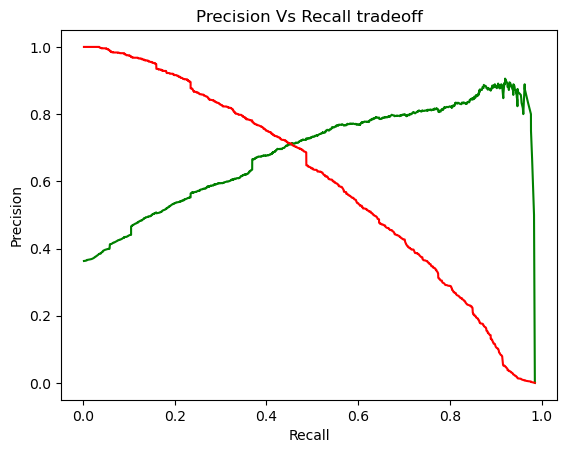

In [303]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Results and observations
### Comparing the values obtained for Train & Test:
### Train:
#### Accuracy : 77.5 %
#### Sensitivity : 77.7 %
#### Specificity : 77.4 %
#### precision score : 74.4 % 
#### recall score: 64.4 %

### Test:
#### Accuracy :  74.1 %
#### Sensitivity : 79.7 %
#### Specifityic :70.8 %
#### precision score: 60.9 %
#### recall score : 79.7 %
## Conclusion :
    
#### ** While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on             Sensitivity and Specificity for calculating the final prediction.
#### ** Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
#### ** Hence overall this model seems to be good.We should be able to give the CEO confidence in making good calls based on this model to get a higher         lead conversion rate of 80%.

### Now lets find out the leads which should be contacted by the company:

In [304]:
#The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.
hot_leads=y_pred_final.loc[y_pred_final["Lead_score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_score
13,4230,1,0.936204,1,94
24,4320,1,0.873940,1,87
39,3285,1,0.892779,1,89
49,3031,1,0.849284,1,85
66,1416,1,0.849284,1,85
...,...,...,...,...,...
2633,8085,1,0.872171,1,87
2635,4223,1,0.849284,1,85
2653,7725,1,0.913952,1,91
2655,5258,1,0.847192,1,85


In [305]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([4230, 4320, 3285, 3031, 1416, 8113, 2122, 1618, 7469, 7259, 8510,
       3456,  607, 8090, 6167, 6811, 1086, 1407, 7057, 2489, 2978, 5376,
       2290, 3628, 7993, 6737, 7756, 3074, 6305, 4707, 8243, 1444, 5692,
       2273, 8888, 4212, 3248, 6519, 3463, 7105, 5979, 3078, 3069, 5292,
       4955, 4791, 4058, 6879,  100, 7699, 8108,   18, 1536, 2118, 2652,
       6771, 2475, 3033, 4125, 4313, 8080, 5126, 6937, 5197, 5330, 6684,
       3500, 3421, 4224, 2984,  818, 6040, 6866, 5167, 5068, 7036, 1585,
       2661, 4438, 8393, 4782,  268, 2434, 5791, 5714, 5818,  759, 6265,
       5793,  447, 3326, 5042, 3307, 8413, 8094, 6137, 8571, 1730, 5293,
       3355, 6729, 3929, 4551,  187, 5664, 4675, 7406, 6538, 6126, 7420,
       3034, 8089, 4817, 8745, 6774, 1287, 5363, 8072, 4789, 8594, 1647,
       5019, 4803, 1387, 6095, 6252, 1502, 5952, 1765, 3926, 8086, 5453,
       9206, 4877, 1186, 1614, 2094, 4802, 9229, 1928, 3210, 8504, 4038,
        819,  356, 7423, 2124, 7931, 7910, 7268, 89

In [306]:
res.params.sort_values(ascending=False)

Total Time Spent on Website                      1.015794
Lead Origin                                      0.415665
Lead Source                                      0.316938
Last Activity                                    0.161410
TotalVisits                                      0.080834
Specialization                                  -0.031882
Page Views Per Visit                            -0.490574
What matters most to you in choosing a course   -0.536175
Do Not Email                                    -1.535948
const                                           -1.977320
dtype: float64